In [32]:
import msprime
import demesdraw
import csv
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from pathlib import Path

In [ ]:
# Time split for populations
T_split_min = 1000
T_split_mean = 8000

# Choose appropriate standard deviation values
std_devs = np.arange(1000, 5000, 1000)  # Adjust the range and step size as needed

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Loop through different standard deviations
for std_dev in std_devs:
    # Create truncated normal distribution object (omit upper for one-tailed)
    truncated_norm = stats.truncnorm(loc=T_split_mean, scale=std_dev, a=((T_split_min - T_split_mean) / std_dev), b = np.inf)

    # Create x-axis with a wider range than the truncation limit
    x = np.linspace(T_split_min - 3*std_dev, T_split_mean + 3*std_dev, 500)

    # Plot the probability density function (PDF)
    plt.plot(x, truncated_norm.pdf(x), label=f"Standard Deviation: {std_dev}")

    # Customize the plot
    plt.xlabel("Values")
    plt.ylabel("Probability Density")
    plt.title("Truncated Normal Distribution (Varying Standard Deviations)")
    plt.legend()
    plt.grid(True)
    plt.show()

Connected to Python 3.9.18

In [26]:
# Population sizes
N1_max = 200000
N1_min = 50000

# Population size for population 1
N1 = np.random.randint(low = N1_min, high = N1_max)
# Population size for population 2
N2 = int(N1 / 30)

ANC_N = 7_000_000

# Time split for populations
T_split_min = 1000
T_split_mean = 8000

std_dev = 3000

T_split_dist = stats.truncnorm(loc=T_split_mean, scale=std_dev, a=((T_split_min - T_split_mean) / std_dev), b = np.inf)
T_split = int(T_split_dist.rvs(size = 1).item())

# Migration rates
mig_rate = np.random.choice([0, 0.1])

print("Parameter values")
print("================")
print(f"Population 1 size (N1): {N1}")
print(f"Population 2 size (N2): {N2}")
print(f"Ancestral population size (ANC): {ANC_N}")
print(f"Split Time: {T_split}")
print(f"Migration rate: {mig_rate}")
print("================")

Parameter values
Population 1 size (N1): 85471
Population 2 size (N2): 2849
Ancestral population size (ANC): 7000000
Split Time: 5394
Migration rate: 0.0


## Estimating T_split

In [27]:
def set_fixed_params():

    # Population sizes
    N1 = 150000
    N2 = 5000

    ANC_N = 7_000_000

    # Migration rate
    mig_rate = 0

    # Time split for populations
    T_split_min = 1000
    T_split_mean = 8000

    std_dev = 3000

    T_split_dist = stats.truncnorm(loc=T_split_mean, scale=std_dev, a=((T_split_min - T_split_mean) / std_dev), b = np.inf)
    T_split = int(T_split_dist.rvs(size = 1).item())

    print(f"Parameter values")
    print(f"================")
    print(f"Population 1 size: {N1}")
    print(f"Population 2 size: {N2}")
    print(f"Ancestral population size: {ANC_N}")
    print(f"Split Time: {T_split}")
    print(f"Migration rate: {mig_rate}")

    return N1, N2, ANC_N, T_split, mig_rate

In [37]:
def set_dem_model(N1, N2, ANC_N, T_split, mig_rate):

    # Add demography
    demography = msprime.Demography()

    # Add N1 and N2 populations
    demography.add_population(name="POP1", initial_size=N1)
    demography.add_population(name="POP2", initial_size=N2)

    # Add Ancestral population
    demography.add_population(name="ANC", initial_size=ANC_N)

    # Add population split
    demography.add_population_split(time=T_split, derived=["POP1", "POP2"], ancestral="ANC") # split 8k generations ago

    # Add pervasive migration
    demography.set_symmetric_migration_rate(populations=["POP1", "POP2"], rate = mig_rate)

    print(demography)

    # Plot a schematic of the model
    demesdraw.tubes(demography.to_demes(), ax=plt.gca(), seed=1, log_time=True)
    plt.show()

    return demography

Restarted Python 3.9.18

In [29]:
def add_muts(demography):
        
        # Simulate ancestry
        ts = msprime.simulate(
                population_configurations= 
                demography=demography, 
                recombination_rate=8.4e-9,
                sequence_length=1_000,
                random_seed=42)
        print(ts)

        mts = msprime.sim_mutations(ts, rate=3.5e-9, random_seed=42)
        print(mts.tables.sites)

        return(ts)

Parameter values
Population 1 size: 150000
Population 2 size: 5000
Ancestral population size: 7000000
Split Time: 7462
Migration rate: 0
Demography
╟  Populations
║  ┌───────────────────────────────────────────────────────────────────────────────────────────────┐
║  │ id │name  │description  │initial_size  │ growth_rate │  default_sampling_time│extra_metadata  │
║  ├───────────────────────────────────────────────────────────────────────────────────────────────┤
║  │ 0  │POP1  │             │150000.0      │      0      │                      0│{}              │
║  │ 1  │POP2  │             │5000.0        │      0      │                      0│{}              │
║  │ 2  │ANC   │             │7000000.0     │      0      │                7.5e+03│{}              │
║  └───────────────────────────────────────────────────────────────────────────────────────────────┘
╟  Migration Matrix
║  ┌──────────────────────────┐
║  │      │ POP1 │ POP2 │ ANC │
║  ├──────────────────────────┤
║  │  POP1│  0

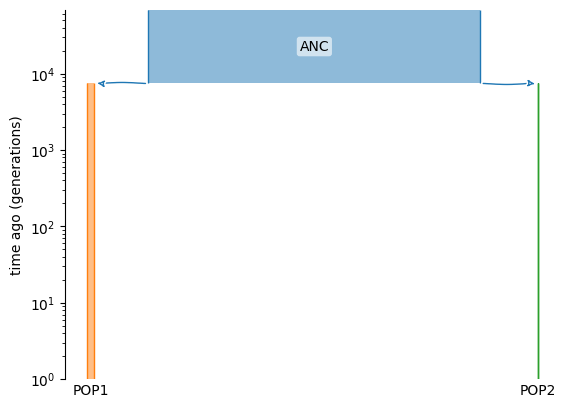

╔═══════════════════════════╗
║TreeSequence               ║
╠═══════════════╤═══════════╣
║Trees          │        571║
╟───────────────┼───────────╢
║Sequence Length│       1000║
╟───────────────┼───────────╢
║Time Units     │generations║
╟───────────────┼───────────╢
║Sample Nodes   │        200║
╟───────────────┼───────────╢
║Total Size     │  158.1 KiB║
╚═══════════════╧═══════════╝
╔═══════════╤════╤═════════╤════════════╗
║Table      │Rows│Size     │Has Metadata║
╠═══════════╪════╪═════════╪════════════╣
║Edges      │3232│101.0 KiB│          No║
╟───────────┼────┼─────────┼────────────╢
║Individuals│ 100│  2.8 KiB│          No║
╟───────────┼────┼─────────┼────────────╢
║Migrations │   0│  8 Bytes│          No║
╟───────────┼────┼─────────┼────────────╢
║Mutations  │   0│ 16 Bytes│          No║
╟───────────┼────┼─────────┼────────────╢
║Nodes      │ 988│ 27.0 KiB│          No║
╟───────────┼────┼─────────┼────────────╢
║Populations│   3│302 Bytes│         Yes║
╟───────────┼────┼────

ValueError: Sample sets must contain at least one element

In [38]:
def run_sims():

    with open(Path.cwd() / "a_gambiae_sims.csv", "w", newline = "") as csvfile:
        writer = csv.writer(csvfile, delimiter = ",")

        # Write header
        writer.writerow(["N1", "N2", "T_split", "MigRate", "Fst", "dxy", "segsites1", "segsites2", "pi1", "pi2", "tajima1", "tajima2"])

        # Run 10000 simulations
        for i in range(10000):

            # Set parameters
            N1, N2, ANC_N, T_split, mig_rate = set_fixed_params()

            # Set demography model
            demography = set_dem_model(N1, N2, ANC_N, T_split, mig_rate)

            # Add mutations
            ts = add_muts(demography)

            print(ts.samples)

            dxy = ts.divergence(sample_sets=[ts.samples(population="POP1"), ts.samples(population="POP2")])

            Fst = ts.Fst(sample_sets=[ts.samples(population="POP1"), ts.samples(population="POP2")])

            ssites = ts.segregating_sites(sample_sets=[ts.samples(population="POP1"), ts.samples(population="POP2")])
            div = ts.diversity(sample_sets=[ts.samples(population="POP1"), ts.samples(population="POP2")])
            tajima = ts.Tajimas_D(sample_sets=[ts.samples(population="POP1"), ts.samples(population="POP2")])
    
            # Write data to file or print data
            writer.writerow([N1, N2, T_split, mig_rate, Fst, dxy, ssites[0], ssites[1], div[0], div[1], tajima[0], tajima[1]])

run_sims()
